In [97]:
import pandas as pd

# 1. Load the dataset

In [98]:
dataset = pd.read_csv('California_Houses.csv')
dataset

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


# 2. separate the features and target

In [99]:
X = dataset.loc[:, 'Median_Income':].values
y = dataset.loc[:, 'Median_House_Value'].values

In [100]:
X

array([[8.32520000e+00, 4.10000000e+01, 8.80000000e+02, ...,
        7.35501807e+05, 6.74325170e+04, 2.12502138e+04],
       [8.30140000e+00, 2.10000000e+01, 7.09900000e+03, ...,
        7.33236884e+05, 6.50499086e+04, 2.08806004e+04],
       [7.25740000e+00, 5.20000000e+01, 1.46700000e+03, ...,
        7.33525683e+05, 6.48672898e+04, 1.88114874e+04],
       ...,
       [1.70000000e+00, 1.70000000e+01, 2.25400000e+03, ...,
        8.30699573e+05, 2.40172220e+05, 2.12097936e+05],
       [1.86720000e+00, 1.80000000e+01, 1.86000000e+03, ...,
        8.34672462e+05, 2.38193866e+05, 2.07923199e+05],
       [2.38860000e+00, 1.60000000e+01, 2.78500000e+03, ...,
        8.25569179e+05, 2.33282769e+05, 2.05473377e+05]])

In [101]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

<Axes: >

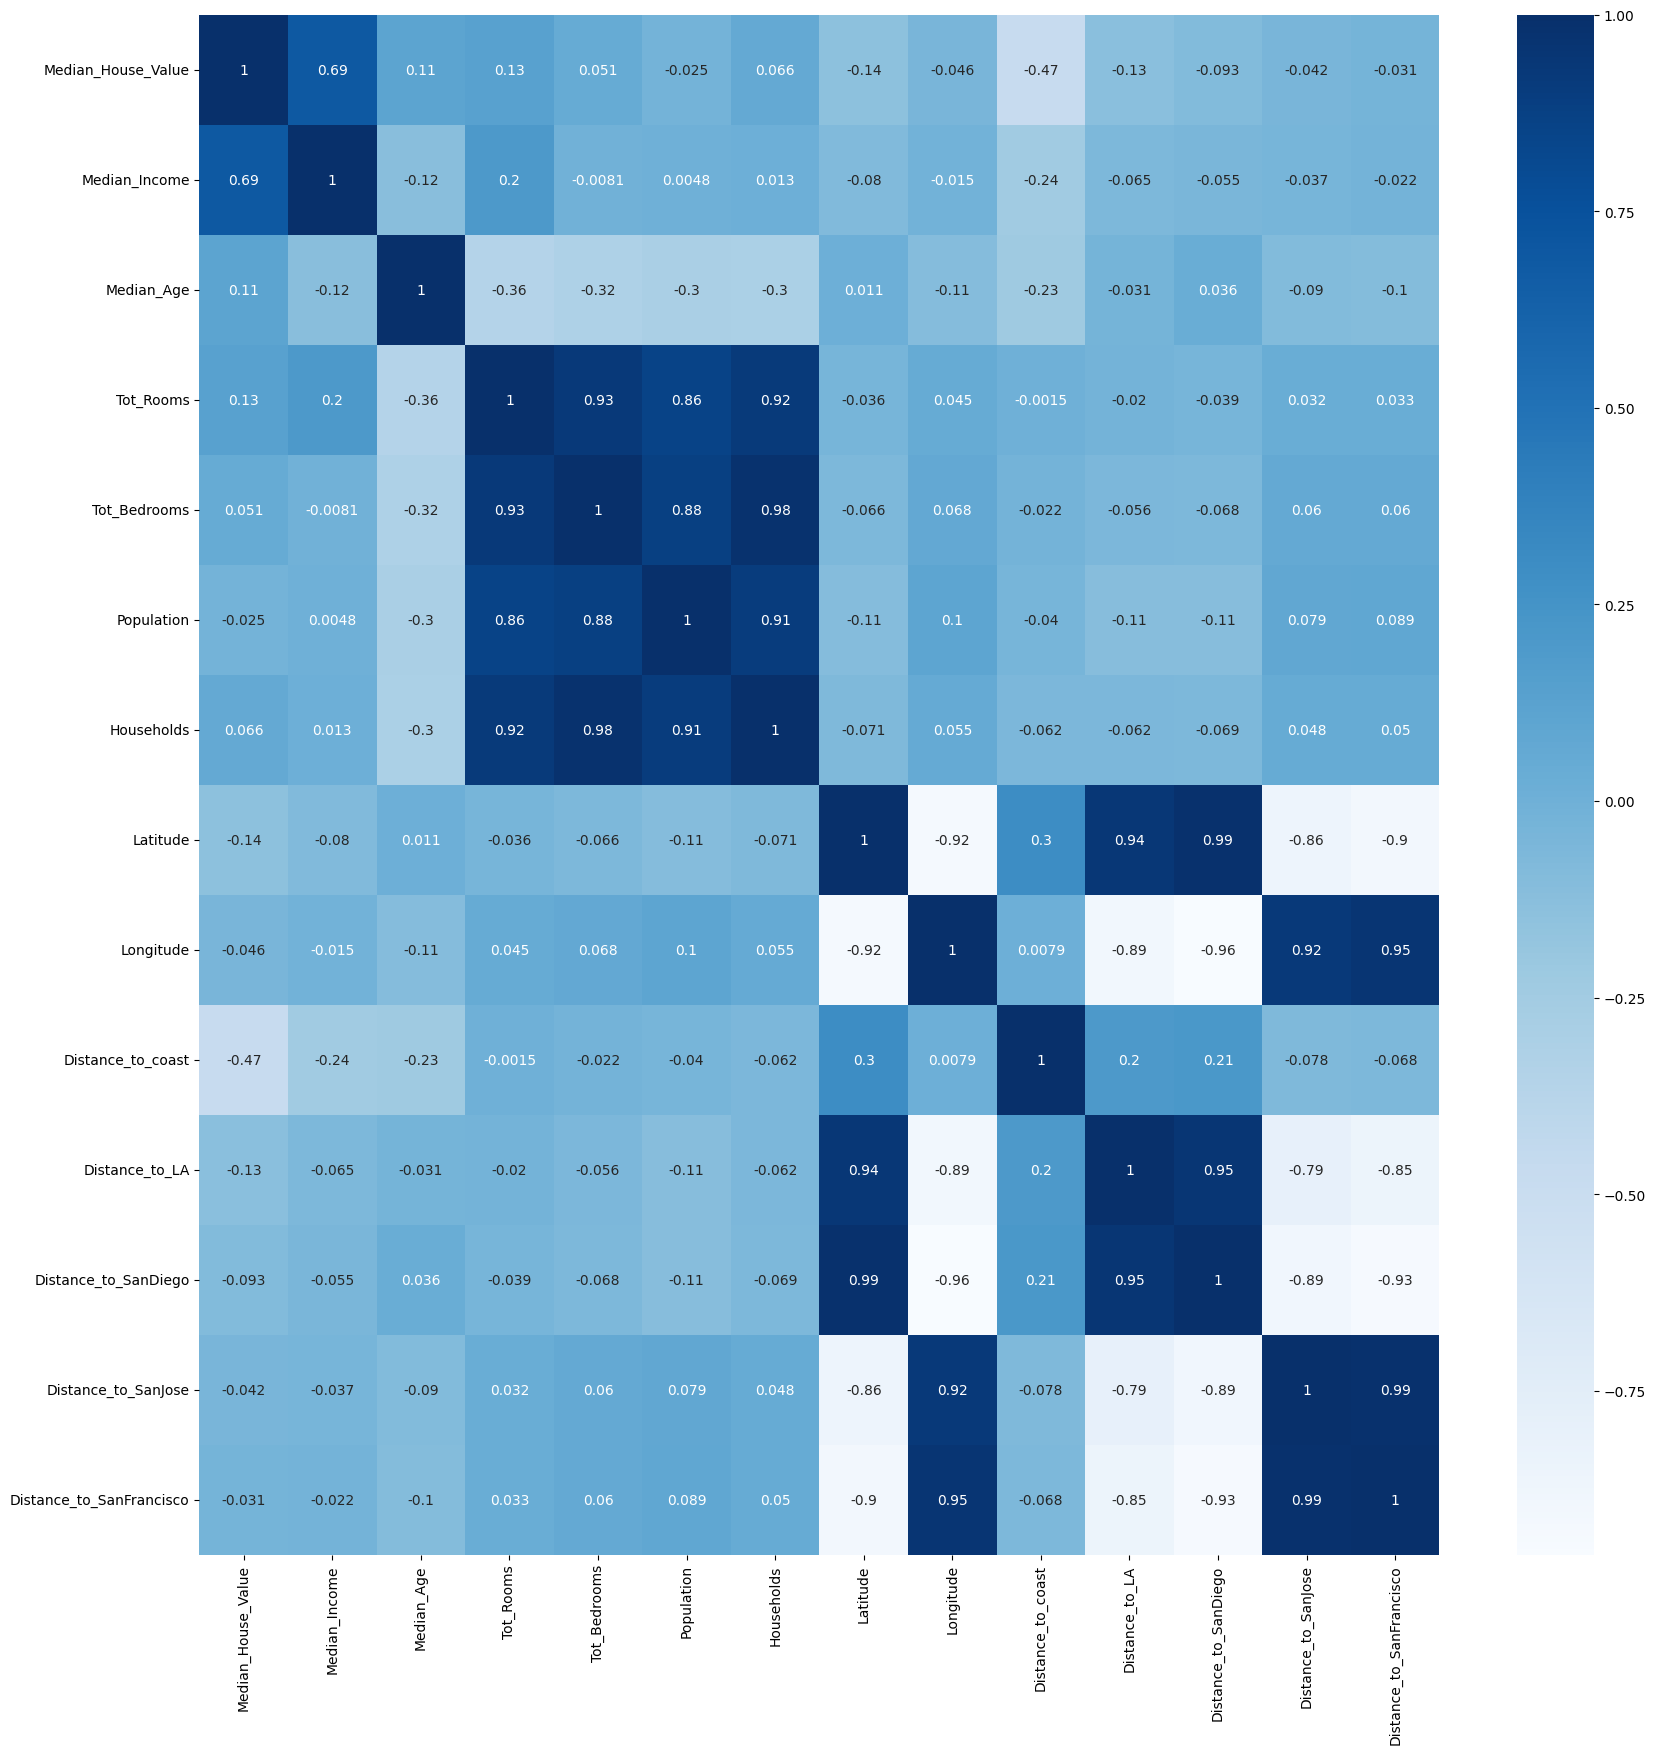

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)

# 3.normalize the data

In [103]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X)
X = sc.transform(X)

In [104]:
X

array([[0.53966842, 0.78431373, 0.02233074, ..., 0.6143395 , 0.07996127,
        0.02302339],
       [0.53802706, 0.39215686, 0.18050257, ..., 0.61244644, 0.07711191,
        0.02261415],
       [0.46602805, 1.        , 0.03726029, ..., 0.61268783, 0.07689352,
        0.02032321],
       ...,
       [0.08276438, 0.31372549, 0.05727657, ..., 0.6939074 , 0.28653996,
        0.23433179],
       [0.09429525, 0.33333333, 0.04725571, ..., 0.69722801, 0.28417405,
        0.22970948],
       [0.13025338, 0.29411765, 0.07078183, ..., 0.68961933, 0.27830089,
        0.22699701]])

# 4. split the data into train, test and validation

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3,random_state=True)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=True)
X_train.shape, X_test.shape, X_val.shape

((14448, 13), (3096, 13), (3096, 13))

# 5. train the model using linear regression

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# 6. predict the test data and check the accuracy and get the error

In [107]:
y_pred = regressor.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mse_linear)
print('Mean Squared Error:', mae_linear)
print('accuracy using test:',regressor.score(X_test,y_test))
print('accuracy using train:',regressor.score(X_train,y_train))
print('accuracy using val:',regressor.score(X_val,y_val))

Mean Absolute Error: 4825653861.388062
Mean Squared Error: 50353.18950579485
accuracy using test: 0.6346950500393218
accuracy using train: 0.6493563065187332
accuracy using val: 0.6430792710669602


# 7. train the model using lasso

In [108]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1,max_iter=100000)
lasso.fit(X_train,y_train)

Lasso(alpha=1, max_iter=100000)

# 8. predict the test data and check the accuracy and get the error

In [109]:
y_pred = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred)
mae_lasso = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae_lasso)
print('Mean Squared Error:', mse_lasso)
print('accuracy using test:',lasso.score(X_test,y_test))
print('accuracy using train:',lasso.score(X_train,y_train))
print('accuracy using val:',lasso.score(X_val,y_val))

Mean Absolute Error: 50360.76884876347
Mean Squared Error: 4825765192.674747
accuracy using test: 0.6346866221927998
accuracy using train: 0.6493532512879465
accuracy using val: 0.643094814001135


# 9. train the model using ridge

In [110]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=20)
ridge.fit(X_train,y_train)

Ridge(alpha=20)

# 10. predict the test data and check the accuracy and get the error

In [111]:
y_pred = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
mae_ridge = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae_ridge)
print('Mean Squared Error:', mse_ridge)
print('accuracy using test:',ridge.score(X_test,y_test))
print('accuracy using train:',ridge.score(X_train,y_train))
print('accuracy using val:',ridge.score(X_val,y_val))

Mean Absolute Error: 53845.07924057838
Mean Squared Error: 5266527470.888111
accuracy using test: 0.6013206480445891
accuracy using train: 0.6131418093637664
accuracy using val: 0.6104788702121449


# 11. compare the results

In [112]:
data = {
    'Model': ['linear', 'lasso', 'ridge'],
    'Mean Squared Error': [mse_linear, mse_lasso, mse_ridge],
    'Mean Absolute Error': [mae_linear, mae_lasso, mae_ridge],
    'Accuracy': [regressor.score(X_test,y_test),lasso.score(X_test,y_test),ridge.score(X_test,y_test)]
}

df = pd.DataFrame(data)
print(df)

    Model  Mean Squared Error  Mean Absolute Error  Accuracy
0  linear        4.825654e+09         50353.189506  0.634695
1   lasso        4.825765e+09         50360.768849  0.634687
2   ridge        5.266527e+09         53845.079241  0.601321
